# Navigation Report

---

For this project, an agent was trained to navigate in a-, square environment (and collect bananas!). 

A +1 reward for collecting a yellow banana was given, and a -1 reward for collecting a blue banana. My agent 's goal was, therefore, to obtain as many yellow bananas as possible while avoiding blue bananas.


### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [11]:
from unityagents import UnityEnvironment
import numpy as np
import time
from collections import deque
import matplotlib.pyplot as plt
import torch
from dqn_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="../../../dl/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The state space had 37 dimensions and includes the velocity of the agent, as well as ray-based perception of objects in the forward path of the agent. Given this knowledge, the agent should have learned how best to pick actions.

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

As mentioned earlier, a reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
#env_info = env.reset(train_mode=True)[brain_name] # reset the environment
#state = env_info.vector_observations[0]            # get the current state
#score = 0                                          # initialize the score
#while True:
#    action = np.random.randint(action_size)        # select an action
#    env_info = env.step(action)[brain_name]        # send the action to the environment
#    next_state = env_info.vector_observations[0]   # get the next state
#    reward = env_info.rewards[0]                   # get the reward
#    done = env_info.local_done[0]                  # see if episode has finished
#    score += reward                                # update the score
#    state = next_state                             # roll over the state to next time step
#    if done:                                       # exit loop if episode finished
#        break
    
#print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [ ]:
#env.close()

### 4. Training the agent!

We train our own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

#### 4.1 Learning Algorithm - DQN

Deep Q-Networks(DQN) was proposed by Mnih et al. (2015). It takes agent's state as input and outputs Q action values. It uses experience replay and target network to stabilize the model training.

#### 4.2 Model Architecture

The model is made of three fully connected layers. The number of neurons in first two layers is 64 and in the last layer it's equal to action size. Each layer's output except the last layer is transformed using the RelU activation function.

#### 4.3 Hyperparameters

* BUFFER_SIZE = int(1e5) # replay buffer size
* BATCH_SIZE = 64 # minibatch size
* GAMMA = 0.99 # discount factor
* TAU = 1e-3 # for soft update of target parameters
* LR = 5e-4 # learning rate
* n_episodes = 2000 # maximum number of training episodes
* max_t = 1000 # maximum number of time steps per episode
* eps_start = 1.0 # starting value of epsilon, for epsilon-greedy action selection
* eps_end = 0.025 # minimum value of epsilon
* eps_decay = 0.85 # multiplicative factor (per episode) for decreasing epsilon

#### 4.4 Training the model



In [6]:
#Training the model
agent = Agent(state_size=37, action_size=4, seed=0)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.025, eps_decay=0.85):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done) 
            state = next_state 
            score += reward                           # update the score
            if done:
                break 
            
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

Episode 100	Average Score: 2.79
Episode 200	Average Score: 9.25
Episode 300	Average Score: 11.74
Episode 359	Average Score: 13.02
Environment solved in 259 episodes!	Average Score: 13.02


#### 4.5 Plotting the scores

Environment solved in 259 episodes! Average Score: 13.02

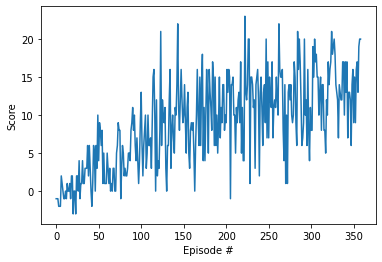

In [7]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

#### 4.6 Testing the model

In [8]:
#Testing the model
from dqn_agent import Agent
filename_to_load = './checkpoint.pth'
final_eps = 0.01

agent = Agent(state_size=37, action_size=4, seed=0)
# load the weights from file


#Since the model is trained on gpu, need to load all gpu tensors to cpu:
agent.qnetwork_local.load_state_dict(torch.load(filename_to_load, map_location=lambda storage, loc: storage))

num_episodes = 100
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=final_eps)        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            print('Episode {}: {}'. format(i_episode, score))
            scores.append(score)
            break

print('All the scores{}'.format(scores))
print("Mean Score: {}".format(np.mean(scores)))


Episode 1: 4.0
Episode 2: 20.0
Episode 3: 21.0
Episode 4: 12.0
Episode 5: 16.0
Episode 6: 17.0
Episode 7: 16.0
Episode 8: 13.0
Episode 9: 12.0
Episode 10: 19.0
Episode 11: 14.0
Episode 12: 11.0
Episode 13: 14.0
Episode 14: 21.0
Episode 15: 15.0
Episode 16: 19.0
Episode 17: 15.0
Episode 18: 7.0
Episode 19: 11.0
Episode 20: 16.0
Episode 21: 13.0
Episode 22: 13.0
Episode 23: 24.0
Episode 24: 14.0
Episode 25: 7.0
Episode 26: 5.0
Episode 27: 8.0
Episode 28: 21.0
Episode 29: 22.0
Episode 30: 13.0
Episode 31: 14.0
Episode 32: 19.0
Episode 33: 17.0
Episode 34: 19.0
Episode 35: 6.0
Episode 36: 18.0
Episode 37: 16.0
Episode 38: 18.0
Episode 39: 21.0
Episode 40: 18.0
Episode 41: 21.0
Episode 42: 16.0
Episode 43: 11.0
Episode 44: 17.0
Episode 45: 5.0
Episode 46: 16.0
Episode 47: 12.0
Episode 48: 21.0
Episode 49: 9.0
Episode 50: 17.0
Episode 51: 21.0
Episode 52: 17.0
Episode 53: 14.0
Episode 54: 12.0
Episode 55: 17.0
Episode 56: 20.0
Episode 57: 17.0
Episode 58: 13.0
Episode 59: 14.0
Episode 60: 22

In [9]:
env.close()


### 5. Future ideas to improve the agent's performance

More experiments can be done to increase the performance of agent by applying different extensions of DQN:

* Double DQN (DDQN)
* Prioritized experience replay
* Dueling DQN
* A3C
* Distributional DQN
* Noisy DQN
